## Minería de Datos (Master en Data Science, UIMP-UC) 
## Tarea 2. Problemas de Clasificación - Reducción de la Dimensión
### AUTOR : OSCAR MIRONES ALONSO

En la presente tarea consideraremos el dataset `meteo.csv`, que podéis descargaros en el GitHub dedicado a este Máster ([meteo.csv](https://github.com/SantanderMetGroup/Master-Data-Science/blob/master/Data_mining/datasets/meteo.csv.)) y que ha sido utilizado en diferentes sesiones prácticas. Dicho dataset contiene en la primera columna el valor de precipitación observado en Lisboa en el periodo 1979-2008 mientras que en las restantes contiene los valores observados de diferentes variables atmosféricas en 40 puntos que cubren aproximadamente la Península Ibérica. Dichas variables serán los `predictores` del modelo mientras que la precipitación será nuestra variable objetivo. En particular los predictores son:

* Altura geopotencial en 500 hPa (columnas 2:41),
* Temperatura del aire en 850 hPa (columnas 42:81), 700 hPa (columnas 82:121) y 500 hPa (columnas 122:161), 
* Temperatura del aire en superficie (columnas 162:201),
* Humedad específica del aire en 850 hPa (columnas 202:241) y 500 hPa (columnas 242:281) y 
* Presión al nivel del mar (columnas 282:321)

Para establecer el problema de clasificación consideraremos dos umbrales de discretización, 1 mm y 20 mm, que definen la ocurrencia de precipitación (Wet days) y de precipitaciones intensas (Very heavy precipitation days), respectivamente. Puedes consultar más detalles de la definición en la web de [ECA&D](https://www.ecad.eu//indicesextremes/indicesdictionary.php).

Para el desarrollo de la tarea se permitirá el uso de todo el material incluido en el Moodle de las asignatura así como el desarrollado por el alumno durante la realización de las prácticas.

La entrega consisitirá de un notebook de Jupyter ó un R-MarkDown, junto con el archivo html que éste genera. Ambos ficheros se entregarán a través del Moodle de la asignatura en la tarea correspondiente.

### Punto 1 (3 puntos):

En esta primera parte de la tarea trataremos de ilustrar parte de los problemas reflejados en las sesiones teórico-prácticas planteando diferentes experimentos con el dataset `meteo.csv`.
En primer lugar, considerar el dataset completo incluyendo tanto las variables predictoras como la variable objetivo. Por un lado, calculad las componentes principales con y sin estandarización (`Nota:` consultar la ayuda de la función scale -> `? scale`):

* ¿Cómo contribuye en cada caso la variable objetivo a la primera componente principal?
* ¿A qué componente principal contribuye principalmente la variable objetivo? ¿qué porcentaje de varianza se explica hasta dicha componente?
* En base a los puntos anteriores, ¿puede considerarse en alguno de los casos que la variable objetivo se "eliminaría" del modelo debido a su contribución a cada una de las componentes principales?
* ¿Cómo se distribuye la contribución de las diferentes variables del espacio original a la primera componente principal? En caso de no estandarizar, ¿puede inferirse alguna relación entre el rango de las variables y su contribución a la primera componente principal?

`Nota 1:` en principio es posible trabajar con el dataset completo sin seleccionar un subconjunto pero si surge algún problema de memoria podéis considerar únicamente los primeros 10 años (~3650 filas).

`Nota 2:` usad las herramientas gráficas vistas durante la práctica para ilustrar los resultados y las conclusiones obtenidas.

In [16]:
data = read.csv('meteo.csv')
data = data[-1]#quitamos la columna de indice

Comenzamos calculando las componentes principales sin estandarización y con estandarización respectivamente. Estamos incluyendo la variable a predecir dentro de los predictores.

In [2]:
#sin estandarizar
pca = prcomp(data)
#con estandarizacion
pca_std = prcomp(data,center = TRUE, scale. = TRUE)#centramos y escalamos con los argumentos de pca

Vamos a ver en cada caso como contribuye nuestra variable objetivo (y) a la primera componente principal.

In [3]:
head(pca$rotation[,1])

y            X1            X2            X3            X4 
-0.0002230218  0.1255372026  0.1359833566  0.1443140240  0.1492781409 
           X5 
 0.1499196274

In [4]:
head(pca_std$rotation[,1])

y          X1          X2          X3          X4          X5 
-0.01033838  0.05741723  0.05566149  0.05359281  0.05088586  0.04737046

En el caso que no hemos realizado un escalado de los datos, se puede ver que la contribución de la variable objetivo es residual. Las variables que más contribuyen tienen un orden de a la menos 1, mientras que la variable objetiva está en un orden a las -5.

Para el caso que hemos escalado observamos que ya no existe tanta diferencia, sin embargo, la variable objetivo sigue sin ser una de las variables que más contribuye a la primera componente principal.

Vamos a analizar en qué componente principal tiene mayor incidencia la variable objetivo.

In [5]:
#hacemos un sort con abs porque tambien nos interesa los casos en los que influya de forma negativa
sort(abs(pca$rotation[1,]), decreasing = TRUE)

PC74         PC73         PC71         PC72         PC70         PC75 
7.046219e-01 6.135178e-01 2.518071e-01 1.427240e-01 1.209882e-01 9.156315e-02 
        PC69         PC76         PC66         PC58         PC79         PC61 
8.699713e-02 6.321486e-02 3.231107e-02 2.307280e-02 2.205187e-02 2.082166e-02 
        PC52         PC62         PC89         PC65         PC85         PC80 
2.056929e-02 2.008087e-02 1.820537e-02 1.802630e-02 1.787016e-02 1.781801e-02 
        PC87         PC64         PC60         PC47         PC82         PC67 
1.724990e-02 1.691823e-02 1.512271e-02 1.506164e-02 1.498889e-02 1.494192e-02 
        PC77         PC84         PC59         PC45         PC39         PC90 
1.218423e-02 1.209654e-02 1.177140e-02 1.059297e-02 1.052796e-02 1.047536e-02 
        PC37         PC46        PC115         PC88         PC63         PC44 
1.014014e-02 1.004013e-02 9.863351e-03 9.757046e-03 9.678025e-03 8.966969e-03 
        PC68        PC111         PC40         PC25         PC35         PC83 
8.816913e-03 8.531995e-03 8.305575e-03 8.035142e-03 8.021701e-03 7.997219e-03 
        PC42         PC30         PC49         PC94        PC102         PC53 
7.461871e-03 7.365490e-03 7.336457e-03 7.130955e-03 6.999494e-03 6.454873e-03 
        PC33        PC108         PC91         PC93         PC81         PC98 
6.206366e-03 5.447831e-03 5.344234e-03 5.259659e-03 5.225626e-03 5.186056e-03 
        PC99        PC130         PC54         PC43        PC104         PC96 
5.110690e-03 4.707567e-03 4.698935e-03 4.439690e-03 4.193475e-03 4.141876e-03 
        PC11        PC110         PC97         PC36        PC114        PC136 
3.981720e-03 3.900772e-03 3.788135e-03 3.668637e-03 3.121765e-03 3.106726e-03 
        PC86         PC28        PC119        PC138        PC105         PC27 
3.082015e-03 3.036838e-03 3.027395e-03 2.668441e-03 2.645537e-03 2.569102e-03 
        PC22         PC57        PC109        PC107         PC78         PC16 
2.483230e-03 2.439413e-03 2.436372e-03 2.403592e-03 2.347764e-03 2.328727e-03 
        PC18        PC117         PC38        PC100        PC101        PC113 
2.312522e-03 2.272568e-03 2.255527e-03 2.212498e-03 2.047656e-03 2.021717e-03 
        PC41         PC48        PC112         PC95          PC5         PC55 
2.018031e-03 1.983596e-03 1.929898e-03 1.745822e-03 1.624194e-03 1.621417e-03 
       PC128        PC125         PC20         PC13          PC9        PC149 
1.616734e-03 1.552627e-03 1.534507e-03 1.529640e-03 1.512929e-03 1.487083e-03 
        PC10        PC140        PC127        PC175        PC171        PC124 
1.476160e-03 1.456531e-03 1.452683e-03 1.427277e-03 1.423181e-03 1.394815e-03 
         PC6        PC160         PC31         PC12         PC26        PC126 
1.340611e-03 1.337180e-03 1.314119e-03 1.279834e-03 1.275853e-03 1.262454e-03 
        PC14        PC181        PC162        PC177        PC123         PC56 
1.255121e-03 1.170739e-03 1.169226e-03 1.151477e-03 1.119479e-03 1.090257e-03 
        PC21        PC142        PC116         PC50        PC180        PC148 
1.071330e-03 1.069346e-03 9.777199e-04 9.547626e-04 9.445376e-04 9.274495e-04 
       PC150        PC155        PC129        PC196        PC103        PC147 
9.138718e-04 9.116609e-04 8.670834e-04 8.332281e-04 7.943395e-04 7.905176e-04 
       PC163        PC192        PC191        PC137         PC24          PC3 
7.803520e-04 7.339331e-04 7.120601e-04 6.923945e-04 6.717335e-04 6.708867e-04 
        PC34         PC29        PC200        PC179        PC133        PC153 
6.605898e-04 6.428965e-04 6.276707e-04 6.080866e-04 5.889940e-04 5.824231e-04 
       PC222        PC154        PC135        PC187        PC170         PC51 
5.722599e-04 5.621779e-04 5.607912e-04 5.585271e-04 5.479716e-04 5.477697e-04 
       PC131        PC161        PC172        PC208        PC120          PC4 
5.265192e-04 5.180807e-04 5.125719e-04 5.090133e-04 5.035301e-04 4.974989e-04 
       PC205        PC184         PC32        PC146       

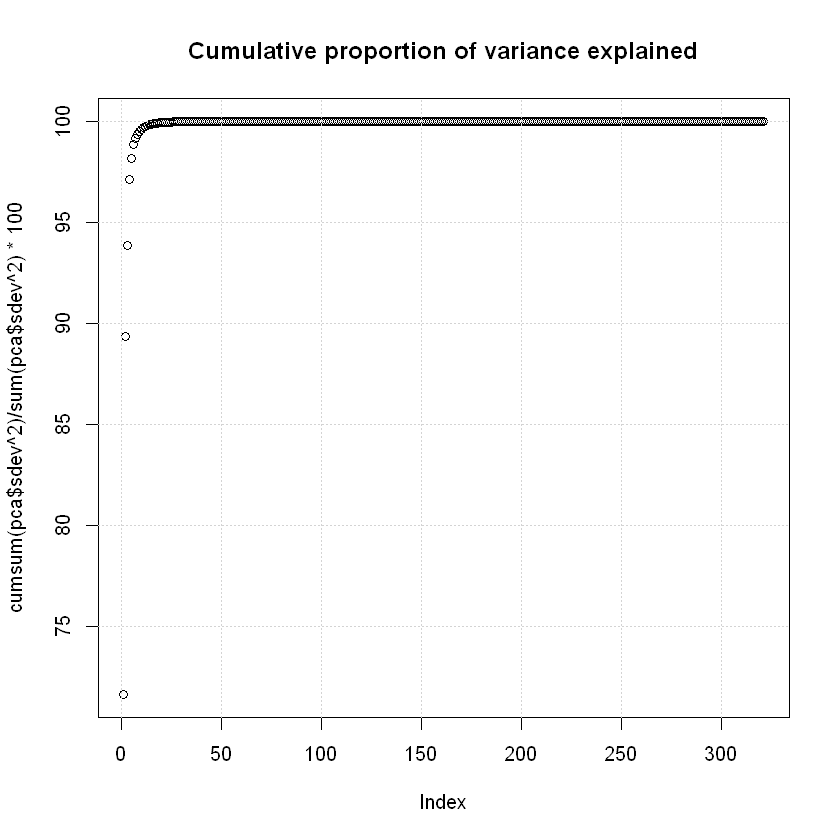

In [6]:
plot(cumsum(pca$sdev^2)/sum(pca$sdev^2)*100,main="Cumulative proportion of variance explained")
grid()

Para el caso de no estandarización, observamos que la variable objetivo donde más influye es en la PC 74, donde la proporción de varianza acumulada ya es practicamente el 100%. 

In [7]:
sort(abs(pca_std$rotation[1,]), decreasing = TRUE)

PC23         PC22         PC26         PC24         PC21         PC19 
5.528273e-01 5.442398e-01 3.239358e-01 2.285128e-01 2.229056e-01 1.614327e-01 
        PC15         PC28         PC38         PC17         PC18         PC14 
1.549762e-01 1.415482e-01 1.206936e-01 1.179728e-01 1.098634e-01 1.096353e-01 
        PC16          PC6          PC8          PC9          PC3         PC42 
1.007813e-01 8.900383e-02 8.354051e-02 8.353738e-02 6.397630e-02 5.922342e-02 
        PC44         PC46         PC36         PC37         PC41         PC27 
4.894082e-02 4.188397e-02 4.129474e-02 3.953800e-02 3.912237e-02 3.882486e-02 
        PC12          PC2         PC25         PC20         PC50         PC39 
3.873798e-02 3.849341e-02 3.571250e-02 3.452069e-02 3.309070e-02 2.954821e-02 
        PC51         PC62          PC4         PC71         PC11         PC67 
2.798353e-02 2.536290e-02 2.371934e-02 2.333913e-02 2.236197e-02 2.134451e-02 
        PC63         PC64         PC34         PC78         PC10         PC47 
2.047345e-02 1.892049e-02 1.863371e-02 1.861479e-02 1.778078e-02 1.773067e-02 
        PC69         PC49         PC31         PC75          PC7         PC52 
1.704401e-02 1.672751e-02 1.662303e-02 1.599378e-02 1.582788e-02 1.563419e-02 
        PC72         PC45         PC65         PC40         PC32          PC5 
1.485188e-02 1.442459e-02 1.403662e-02 1.381299e-02 1.356554e-02 1.274300e-02 
        PC59         PC73         PC79         PC81         PC61         PC30 
1.129557e-02 1.123841e-02 1.111400e-02 1.069845e-02 1.062701e-02 1.041179e-02 
         PC1         PC70         PC33         PC29         PC54         PC60 
1.033838e-02 1.025479e-02 1.001571e-02 9.942659e-03 8.617133e-03 8.400291e-03 
       PC118         PC57         PC77         PC97         PC86         PC84 
7.873047e-03 7.643229e-03 7.613368e-03 7.502191e-03 7.211061e-03 7.112762e-03 
        PC58        PC125        PC131        PC107         PC89         PC88 
7.067395e-03 6.962882e-03 6.713771e-03 6.362812e-03 6.002076e-03 5.928098e-03 
       PC119        PC129         PC35         PC87        PC105        PC101 
5.926411e-03 5.807958e-03 5.748827e-03 5.584867e-03 5.455513e-03 5.391629e-03 
        PC76        PC150        PC117         PC13         PC95        PC110 
5.277783e-03 5.274697e-03 5.201565e-03 5.187606e-03 4.891292e-03 4.878318e-03 
       PC142        PC116         PC92        PC121         PC82        PC132 
4.870788e-03 4.818893e-03 4.751735e-03 4.611068e-03 4.374677e-03 4.230189e-03 
        PC83         PC80        PC155        PC126         PC90         PC98 
4.165113e-03 4.160359e-03 3.863695e-03 3.829718e-03 3.783884e-03 3.778295e-03 
        PC96         PC85        PC103        PC122         PC43        PC106 
3.744917e-03 3.659324e-03 3.627155e-03 3.613886e-03 3.578371e-03 3.510832e-03 
       PC109         PC53        PC145        PC138         PC48        PC137 
3.451086e-03 3.385832e-03 3.384653e-03 3.270587e-03 3.136692e-03 3.135607e-03 
       PC160        PC104        PC149        PC165        PC175         PC91 
3.062663e-03 2.985865e-03 2.973306e-03 2.942471e-03 2.913212e-03 2.908088e-03 
       PC167        PC114        PC169        PC111        PC151        PC108 
2.769363e-03 2.766169e-03 2.726636e-03 2.606432e-03 2.576183e-03 2.524475e-03 
        PC66        PC153        PC164        PC162         PC94        PC102 
2.430716e-03 2.335569e-03 2.308177e-03 2.261611e-03 2.181114e-03 2.160675e-03 
       PC187        PC195        PC130        PC185        PC127        PC134 
1.997880e-03 1.957364e-03 1.893715e-03 1.840038e-03 1.831641e-03 1.789505e-03 
        PC56        PC200        PC147        PC156         PC93        PC159 
1.783779e-03 1.770842e-03 1.621767e-03 1.592245e-03 1.563437e-03 1.493810e-03 
       PC100        PC112         PC55        PC140         PC74        PC141 
1.438758e-03 1.428355e-03 1.427911e-03 1.424078e-03 1.357464e-03 1.333384e-03 
       PC213        PC201         PC99        PC199       

In [8]:
summary(pca_std)

Importance of components:
                           PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     13.6509 7.1313 3.54378 2.99506 2.78443 2.65021 2.34162
Proportion of Variance  0.5805 0.1584 0.03912 0.02795 0.02415 0.02188 0.01708
Cumulative Proportion   0.5805 0.7389 0.77808 0.80602 0.83017 0.85205 0.86914
                          PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     2.1571 1.79761 1.66570 1.55079 1.46572 1.28438 1.25807
Proportion of Variance 0.0145 0.01007 0.00864 0.00749 0.00669 0.00514 0.00493
Cumulative Proportion  0.8836 0.89370 0.90234 0.90983 0.91653 0.92167 0.92660
                          PC15    PC16    PC17    PC18    PC19    PC20    PC21
Standard deviation     1.19591 1.16828 1.13629 1.04946 1.00839 0.98511 0.92861
Proportion of Variance 0.00446 0.00425 0.00402 0.00343 0.00317 0.00302 0.00269
Cumulative Proportion  0.93105 0.93530 0.93933 0.94276 0.94592 0.94895 0.95163
                          PC22    

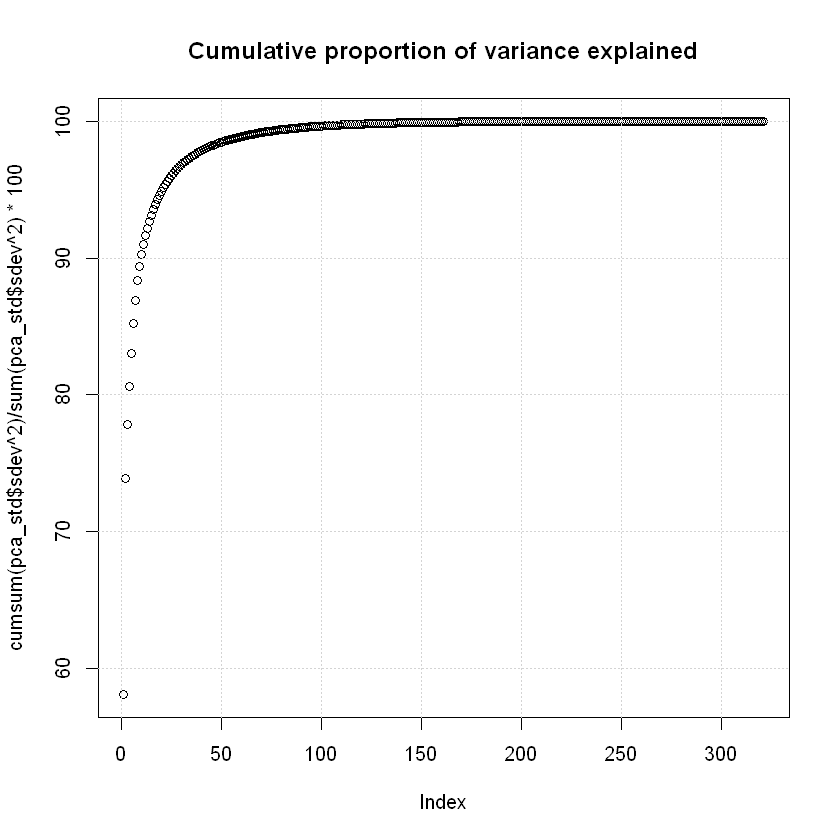

In [9]:
plot(cumsum(pca_std$sdev^2)/sum(pca_std$sdev^2)*100,main="Cumulative proportion of variance explained")
grid()

Cuando los datos estan estandarizados, la PC donde más influye es la número 23, donde el porcentaje de varianza acumulada es del 95%.

Por tanto, en el caso de la no estandarización de los datos tendriamos que la variable objetivo se eliminaría del modelo debido a su contribución. La variable objetivo contribuye en PCs muy lejanas donde ya el porcentaje de varianza acumulada es practicamente del 100%. En el caso de estandarización, dependería de la información de varianza con la que nos quisieramos quedar. Aunque perfectamente podriamos tenerla en cuenta si queremos tener una información superior al 95% de la varianza acumulada.

In [10]:
head(sort(abs(pca$rotation[,1]), decreasing = TRUE),50)

X25        X24        X30        X29        X20        X19        X35 
0.16673520 0.16665126 0.16584488 0.16573995 0.16560772 0.16539974 0.16286284 
       X34        X15        X23        X14        X28        X18        X33 
0.16268456 0.16253646 0.16226907 0.16224178 0.16119392 0.16109940 0.15820538 
       X40        X39        X13        X10         X9        X22        X38 
0.15811082 0.15767356 0.15747488 0.15722385 0.15688092 0.15368075 0.15296434 
       X17        X27         X8         X5        X32         X4        X12 
0.15274569 0.15262906 0.15190567 0.14991963 0.14962277 0.14927814 0.14906809 
       X37         X3         X7        X21        X26        X16        X31 
0.14440075 0.14431402 0.14334810 0.14220325 0.14138839 0.14128957 0.13834290 
       X11         X2        X36         X6         X1       X300       X305 
0.13797242 0.13598336 0.13344259 0.13243293 0.12553720 0.05384273 0.05383986 
      X295       X310       X314       X315       X290       X285       X319 
0.05174282 0.05165738 0.05082027 0.05049720 0.04978844 0.04796658 0.04790337 
      X309 
0.04755613

In [11]:
sort(abs(pca_std$rotation[,1]), decreasing = TRUE)

X103          X57         X108          X63         X148         X102 
0.0699745353 0.0699459958 0.0699328936 0.0699229775 0.0697994026 0.0696942443 
        X149          X58          X62         X153         X107         X154 
0.0696669012 0.0695642786 0.0695027005 0.0694771760 0.0693824178 0.0693656862 
        X143          X98          X97         X144         X175         X109 
0.0693364397 0.0693194387 0.0693168284 0.0691975131 0.0691790728 0.0691604270 
         X68          X56         X179         X183         X113         X101 
0.0691594011 0.0690844427 0.0690544329 0.0690177767 0.0689831657 0.0689389946 
        X104          X96         X170         X147          X52          X61 
0.0689046484 0.0688289224 0.0688240874 0.0688177808 0.0688124502 0.0687390715 
        X180         X158          X53         X174         X159         X152 
0.0686920541 0.0685968851 0.0685968407 0.0685841912 0.0685728097 0.0685298947 
        X176         X114         X193         X177         X112         X106 
0.0684847980 0.0684830205 0.0684703938 0.0684246068 0.0684136347 0.0683910671 
        X171         X138         X142         X189         X178         X188 
0.0683854544 0.0683791060 0.0683771615 0.0683334128 0.0683113573 0.0683103186 
        X150         X173          X67          X99         X184          X92 
0.0682817688 0.0682666793 0.0682535631 0.0682224773 0.0681861557 0.0681572990 
         X59         X155          X69         X139          X51          X31 
0.0681327716 0.0681243371 0.0681117629 0.0680886619 0.0680798607 0.0680743273 
        X199          X26         X194          X91         X182         X172 
0.0680576271 0.0680356983 0.0679937771 0.0679821945 0.0679787181 0.0679645257 
         X93          X32          X64         X145         X185         X186 
0.0679590159 0.0679044812 0.0678604141 0.0678454893 0.0678338533 0.0677704497 
         X66         X198          X27          X73         X157          X74 
0.0677531281 0.0677181710 0.0676784069 0.0676758404 0.0676568364 0.0676480093 
        X192         X187         X137         X166          X36         X167 
0.0676155116 0.0675938138 0.0675735158 0.0675393648 0.0674725323 0.0674670021 
        X160         X118          X37         X164         X181         X165 
0.0674650956 0.0674154259 0.0674117842 0.0673799083 0.0673734150 0.0673360594 
        X119          X54          X21         X111         X169          X47 
0.0672968764 0.0672968260 0.0672462613 0.0672060920 0.0671741389 0.0671463506 
        X146          X72         X117         X141         X133          X46 
0.0671006372 0.0669362549 0.0669190749 0.0669059414 0.0668843061 0.0668629193 
         X33         X105         X197         X168         X140          X94 
0.0668539398 0.0668400886 0.0668123028 0.0668095706 0.0667210277 0.0667070004 
        X110          X22         X151          X86         X191          X87 
0.0666545243 0.0666364542 0.0666249287 0.0666056313 0.0665045542 0.0664967856 
         X38          X28          X48         X132         X134         X100 
0.0664810671 0.0664509611 0.0663934352 0.0663920762 0.0663915951 0.0662519130 
        X115         X136          X79          X88         X200          X71 
0.0661490295 0.0661324882 0.0660963285 0.0660795890 0.0660459502 0.0660243054 
        X163         X120         X156         X190         X162          X16 
0.0658446328 0.0658416757 0.0657814993 0.0657749139 0.0657218078 0.0657111130 
        X116         X195          X42         X161          X78          X23 
0.0657089472 0.0655099242 0.0653505959 0.0653362149 0.0653003761 0.0652023154 
        X131          X41         X135         X128          X81          X17 
0.0651523850 0.0650538745 0.0649534448 0.0649139459 0.0648446537 0.0648207710 
         X34          X95          X89          X77         X196         X127 
0.0647925335 0.0647477586 0.0647302368 0.0647200166 0.0647056589 0.0646942120 
         X39          X82          X49          X80       

In [86]:
library(factoextra)

Warning message:
"package 'factoextra' was built under R version 3.6.2"
Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



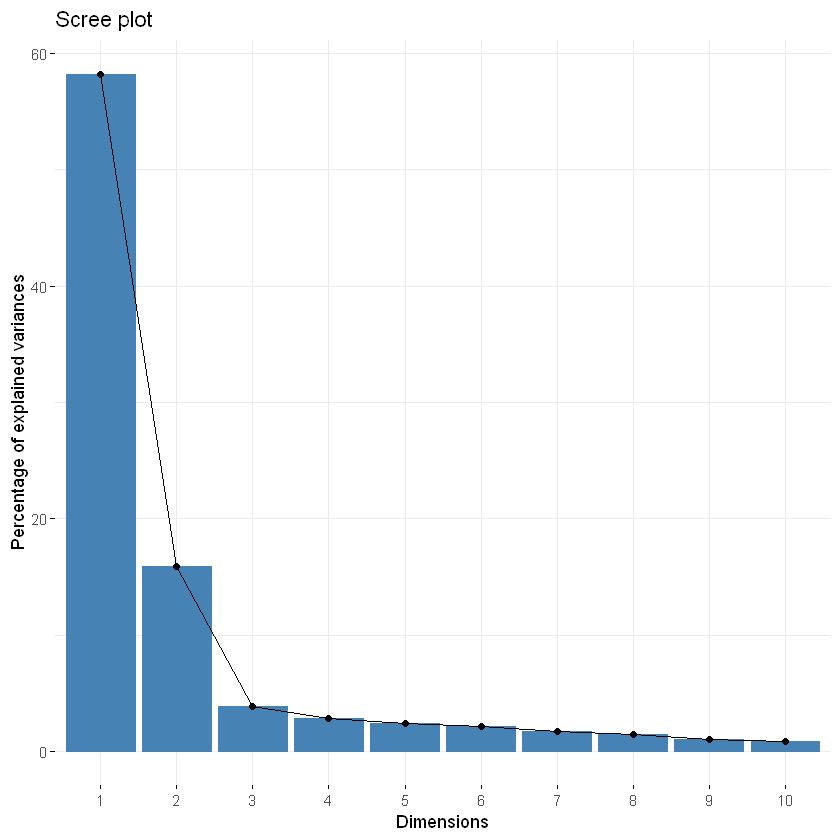

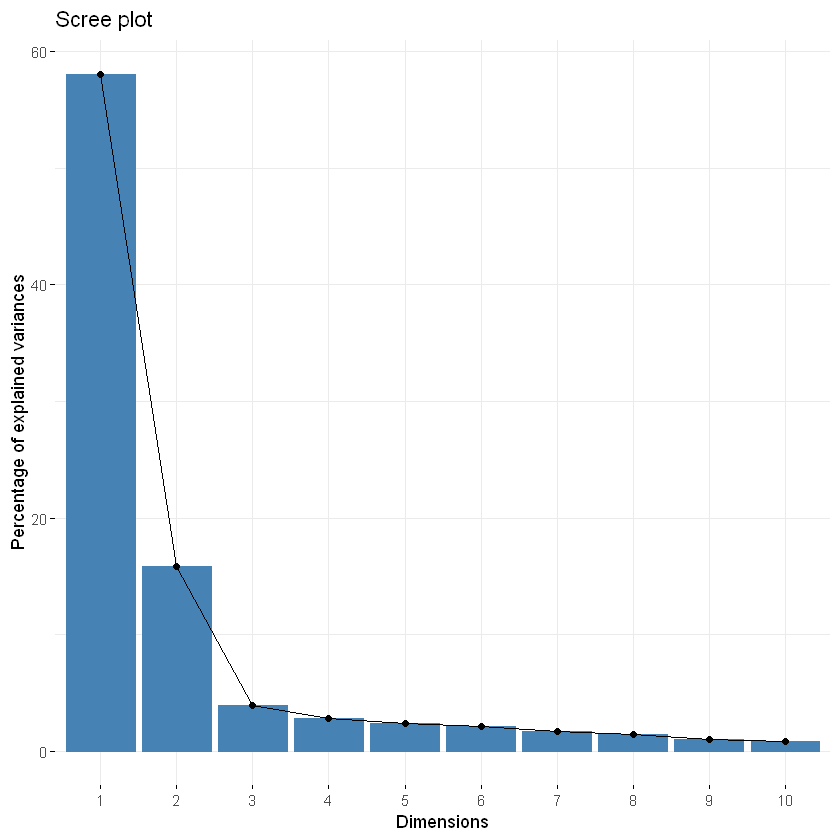

In [88]:
par(mfrow = c(1,2))
fviz_eig(pca)
fviz_eig(pca_std)

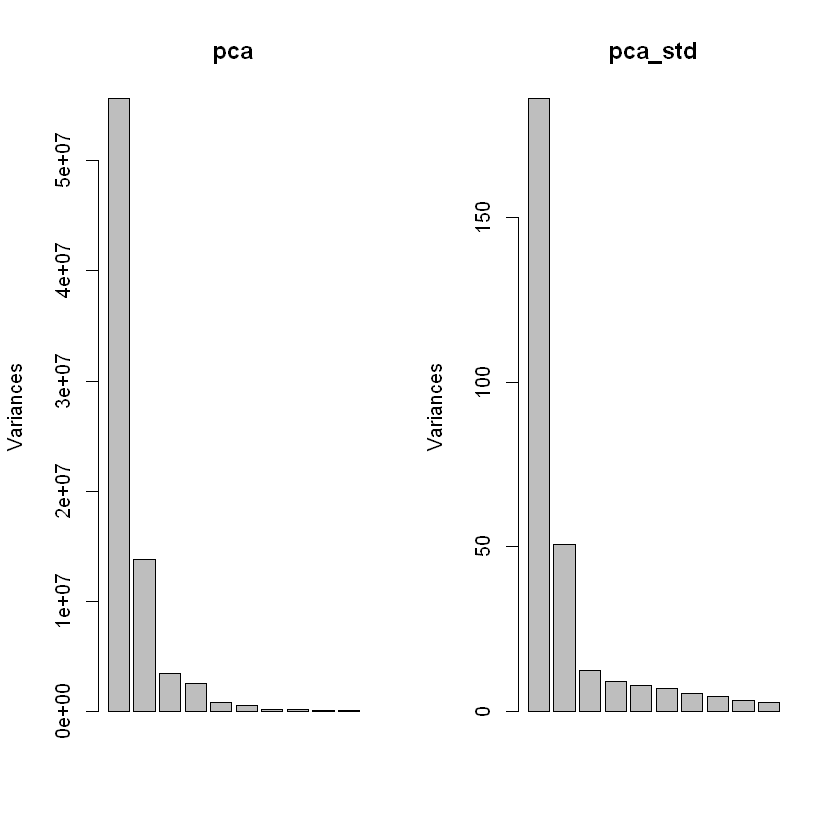

In [12]:
par(mfrow = c(1,2))
plot(pca)
plot(pca_std)

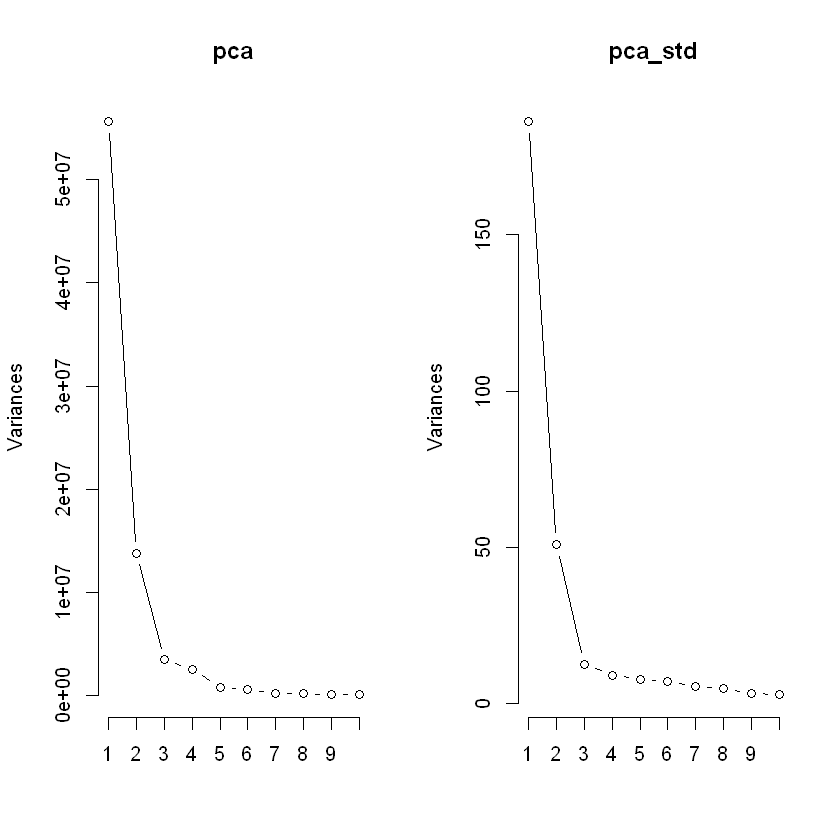

In [13]:
par(mfrow = c(1,2))
screeplot(pca, type = 'lines')
screeplot(pca_std, type = 'lines')

Warning message in arrows(0, 0, y[, 1L] * 0.8, y[, 2L] * 0.8, col = col[2L], length = arrow.len):
"zero-length arrow is of indeterminate angle and so skipped"
Warning message in arrows(0, 0, y[, 1L] * 0.8, y[, 2L] * 0.8, col = col[2L], length = arrow.len):
"zero-length arrow is of indeterminate angle and so skipped"
Warning message in arrows(0, 0, y[, 1L] * 0.8, y[, 2L] * 0.8, col = col[2L], length = arrow.len):
"zero-length arrow is of indeterminate angle and so skipped"
Warning message in arrows(0, 0, y[, 1L] * 0.8, y[, 2L] * 0.8, col = col[2L], length = arrow.len):
"zero-length arrow is of indeterminate angle and so skipped"
Warning message in arrows(0, 0, y[, 1L] * 0.8, y[, 2L] * 0.8, col = col[2L], length = arrow.len):
"zero-length arrow is of indeterminate angle and so skipped"
Warning message in arrows(0, 0, y[, 1L] * 0.8, y[, 2L] * 0.8, col = col[2L], length = arrow.len):
"zero-length arrow is of indeterminate angle and so skipped"
Warning message in arrows(0, 0, y[, 1L] * 0.8,

Warning message in arrows(0, 0, y[, 1L] * 0.8, y[, 2L] * 0.8, col = col[2L], length = arrow.len):
"zero-length arrow is of indeterminate angle and so skipped"
Warning message in arrows(0, 0, y[, 1L] * 0.8, y[, 2L] * 0.8, col = col[2L], length = arrow.len):
"zero-length arrow is of indeterminate angle and so skipped"
Warning message in arrows(0, 0, y[, 1L] * 0.8, y[, 2L] * 0.8, col = col[2L], length = arrow.len):
"zero-length arrow is of indeterminate angle and so skipped"
Warning message in arrows(0, 0, y[, 1L] * 0.8, y[, 2L] * 0.8, col = col[2L], length = arrow.len):
"zero-length arrow is of indeterminate angle and so skipped"
Warning message in arrows(0, 0, y[, 1L] * 0.8, y[, 2L] * 0.8, col = col[2L], length = arrow.len):
"zero-length arrow is of indeterminate angle and so skipped"
Warning message in arrows(0, 0, y[, 1L] * 0.8, y[, 2L] * 0.8, col = col[2L], length = arrow.len):
"zero-length arrow is of indeterminate angle and so skipped"
Warning message in arrows(0, 0, y[, 1L] * 0.8,

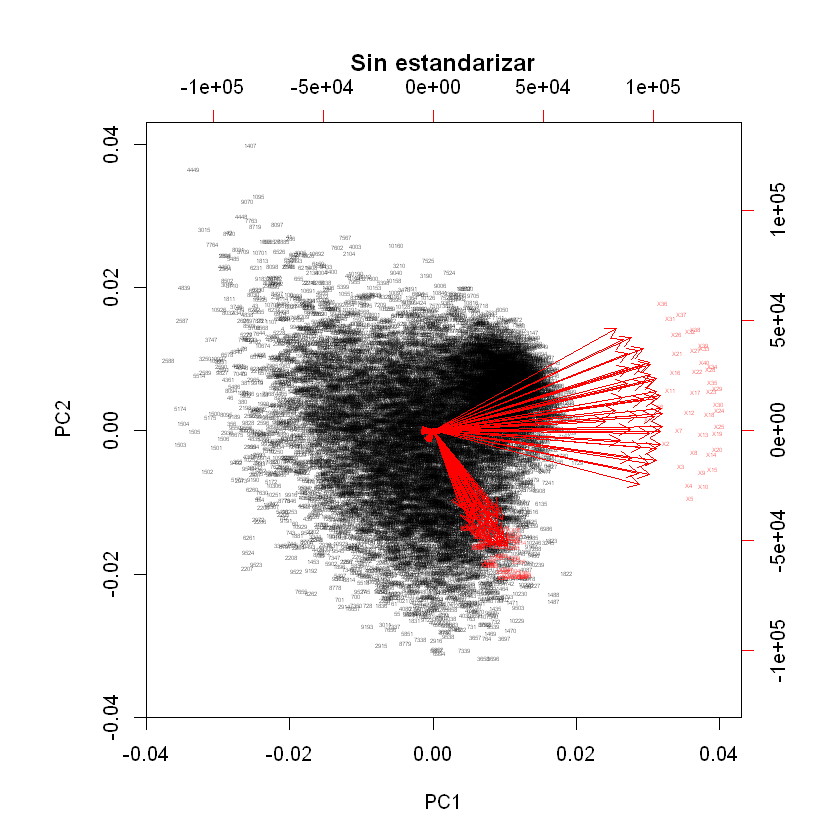

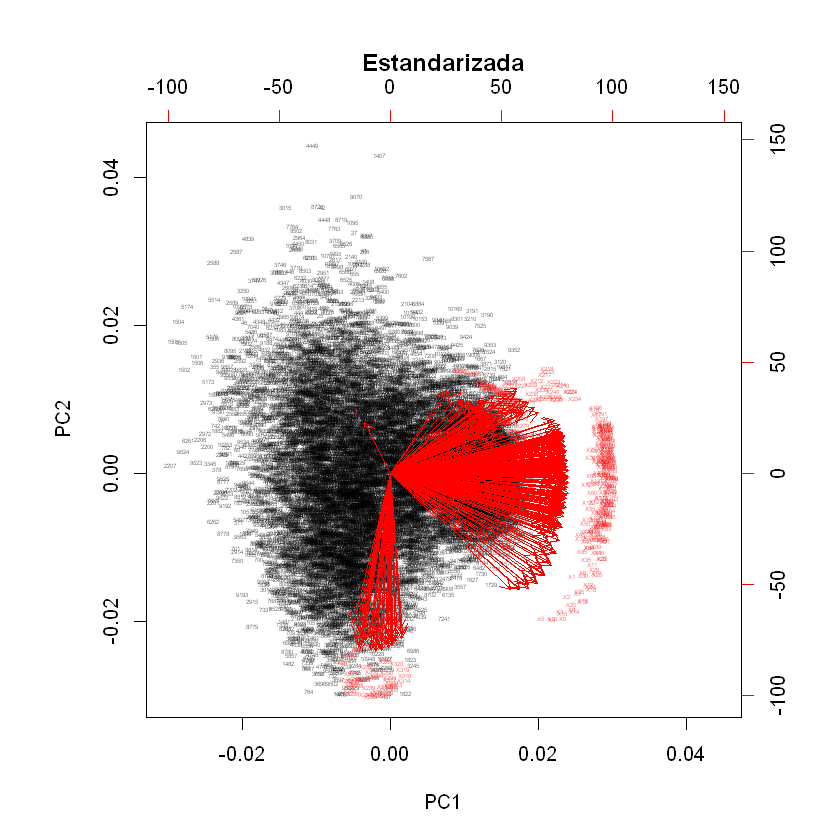

In [14]:
biplot(pca, cex = .3, main = 'Sin estandarizar')
biplot(pca_std, cex = .3, main = 'Estandarizada')

Notamos que en el caso de estandarización de los datos la contribución de las variables en la primera componente principal está muy repartida. Es decir, observamos que la mayoría de las variables tiene un nivel de contribución similar y su distribución en el espacio original es muy variado. Además, se puede ver facilmente en los screeplots como la diferencia de ordenes de varianza de pca estandarizado y pca sin estandarizar son muy desiguales.

Lo que sucede en el caso de no estandarización es diferente, ya que todas las variables que más ponderan se encuentran entre las 40 primeras del espacio original, es decir, variables referidas a altura geopotencial. Esto es debido al rango de los datos de estas variables. El rango de los datos de estas variables es mayor a las demás, por tanto al no estandarizar, la varianza de estos datos es mayor al de las demás variables, con lo cual el peso de su varianza será mayor y contribuirá más.

### Punto 2 (3 puntos):

A continuación, consideraremos la serie de precipitación discretizada a partir del valor 1 mm, que es el estándar definido para establecer los días en que ha llovido. El objetivo de este apartado es predecir la ocurrencia de precipitación en Lisboa a partir de los predictores antes definidos. Para ello consideraremos, por un lado, las componentes principales obtenidas estandarizando los datos originales y, por otro lado, el método `KNN`. Dividir la muestra en dos subconjuntos, el primero (20 primeros años) lo utilizaremos para calibrar el modelo y obtener su configuración óptima, mientras que el segundo (10 últimos años) lo utilizaremos como test independiente de cara a comparar diferentes métodos.

* Considerad diferentes umbrales de varianza explicada y el número de PCs asociado (p.e. 40%, 60%, 80% y 90%) y obtend el valor óptimo de `K` en cada caso rastreando valores entre 1 y 15, ¿cómo cambia el valor óptimo? En base a los resultados obtenidos, ¿cuantas PCs considerarías para entrenar el modelo? (`Nota:` ver práctica de `KNN`)
* Para la configuración óptima calibrada con el conjunto de entrenamiento realizad la predicción sobre el conjunto de test y estimad los errores cometidos sobre este conjunto.


In [17]:
#discretizamos la variable objetivo para ver indicar si llueve o no
rain = ifelse(data$y >= 1, "rains", "Not rain")
data$y = as.factor(rain)
names(data)[1] = "rain"
pca = prcomp(data[,-1], center = TRUE , scale. = TRUE)
datos = data.frame(rain = data$rain, pca$x)

In [19]:
#realizamos la partición de train y test
indtrain = 1:7305
indtest = 7306:10958
datos.train = datos[indtrain,] 
datos.test = datos[indtest,]

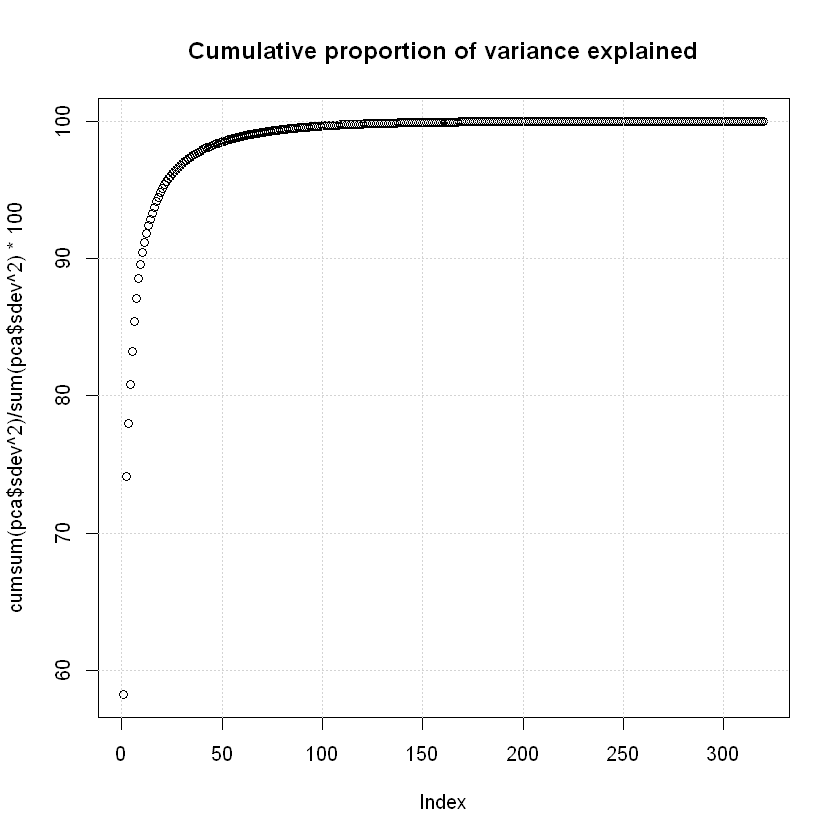

In [20]:
plot(cumsum(pca$sdev^2)/sum(pca$sdev^2)*100,main="Cumulative proportion of variance explained")
grid()

Para el 60% de la varianza explicada elegimos la primera componente principal.

In [21]:
library(class)

1         2         3         4         5         6         7         8 
0.7018889 0.7035313 0.7402135 0.7372023 0.7612921 0.7612921 0.7678620 0.7771694 
        9        10        11        12        13        14        15 
0.7831919 0.7796332 0.7878456 0.7875719 0.7924993 0.7903093 0.7930468

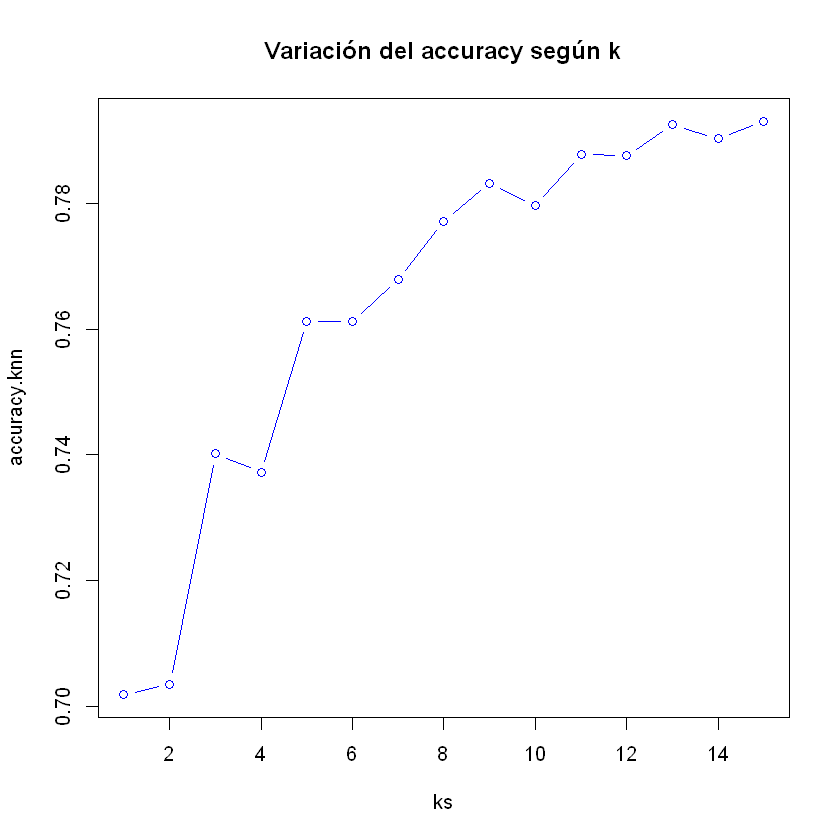

In [22]:
ks <- 1:15
accuracy.knn <- rep(NA, length(ks))
names(accuracy.knn) <- ks
for (k in ks){   
    obs <- datos.test$rain
    pred <- knn(train = datos.train[,2,drop = FALSE], test = datos.test[,2,drop = FALSE],
                cl = datos.train$rain, k = k)
    accuracy.knn[as.character(k)] <- sum(diag(table(obs, pred)))/sum(table(obs, pred))            
}
accuracy.knn
plot(ks,accuracy.knn, type = 'b', col = 'blue', main = 'Variación del accuracy según k')

Observamos que el mejor fit se obtiene con 15 vecinos, aunque ya apenas hay diferencia entre elegir entre 11-15 vecinos en este caso. Veamos ahora si mejoramos el accuracy utilizando un mayor número de componentes principales.

Para el 80% de la varianza explicada solamente necesitamos 3 componentes principales.

1         2         3         4         5         6         7         8 
0.7889406 0.7831919 0.8171366 0.8217903 0.8280865 0.8321927 0.8310977 0.8360252 
        9        10        11        12        13        14        15 
0.8390364 0.8387627 0.8393102 0.8395839 0.8371202 0.8373939 0.8423214

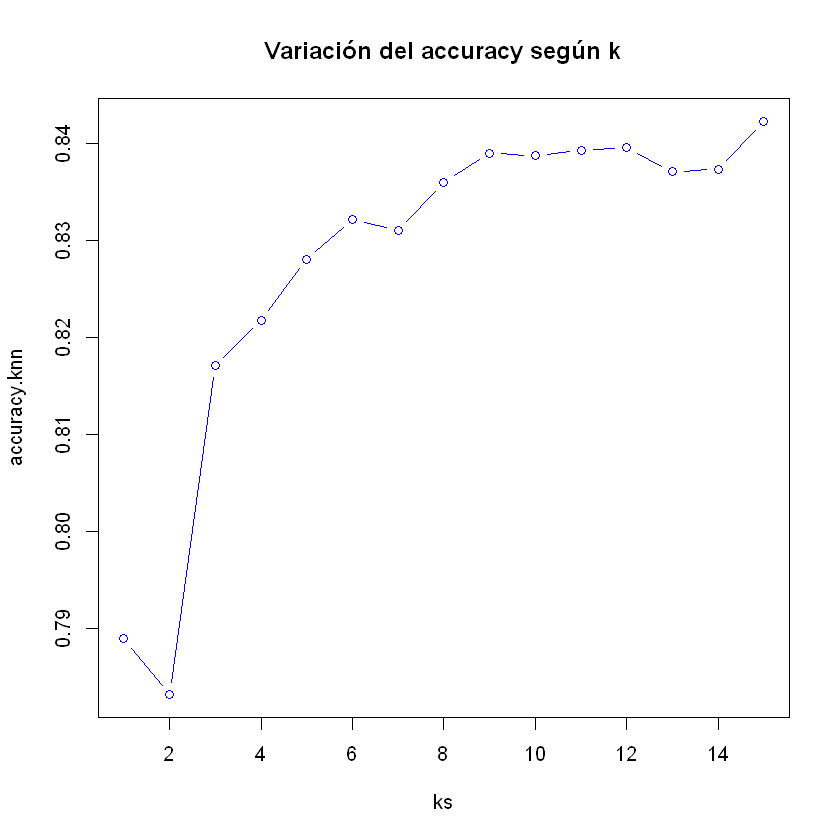

In [23]:
ks <- 1:15
accuracy.knn <- rep(NA, length(ks))
names(accuracy.knn) <- ks
for (k in ks){   
    obs <- datos.test$rain
    pred <- knn(train = datos.train[,2:4], test = datos.test[,2:4],
                cl = datos.train$rain, k = k)
    accuracy.knn[as.character(k)] <- sum(diag(table(obs, pred)))/sum(table(obs, pred))            
}
accuracy.knn
plot(ks,accuracy.knn, type = 'b', col = 'blue', main = 'Variación del accuracy según k')

Podemos observar que el accuracy obtenido es mucho mejor que con una PC. El k óptimo parece ser 15.

Tomando el 85% de la varianza explicada elegimos las cinco primeras PCs.

1         2         3         4         5         6         7         8 
0.8031755 0.7979743 0.8267178 0.8283603 0.8324665 0.8330140 0.8373939 0.8395839 
        9        10        11        12        13        14        15 
0.8436901 0.8412264 0.8406789 0.8425951 0.8464276 0.8453326 0.8477963

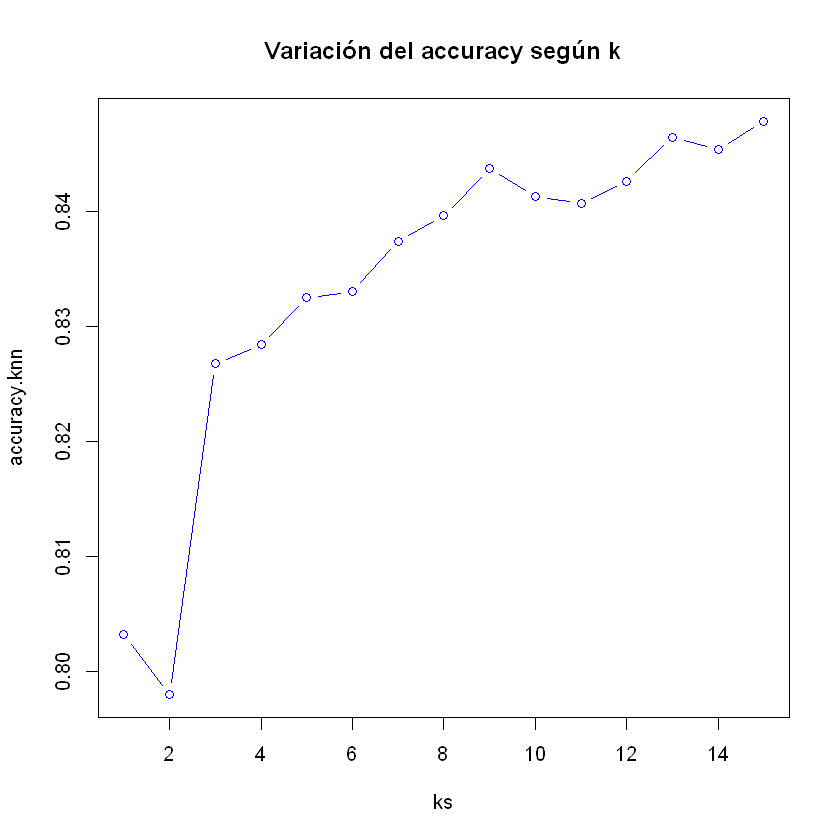

In [24]:
ks <- 1:15
accuracy.knn <- rep(NA, length(ks))
names(accuracy.knn) <- ks
for (k in ks){   
    obs <- datos.test$rain
    pred <- knn(train = datos.train[,2:7], test = datos.test[,2:7],
                cl = datos.train$rain, k = k)
    accuracy.knn[as.character(k)] <- sum(diag(table(obs, pred)))/sum(table(obs, pred))            
}
accuracy.knn
plot(ks,accuracy.knn, type = 'b', col = 'blue', main = 'Variación del accuracy según k')

Vemos que aumentamos el accuracy ligeramente si comparamos con el caso anterior. El k óptimo podria ser 13 o 15.

Tomamos finalmente el 90% de la varianza explicada. Para ello cogemos 10 PCs.

1         2         3         4         5         6         7         8 
0.8215166 0.8152204 0.8453326 0.8417739 0.8404051 0.8434164 0.8502601 0.8510813 
        9        10        11        12        13        14        15 
0.8513551 0.8510813 0.8546400 0.8571038 0.8546400 0.8546400 0.8551875

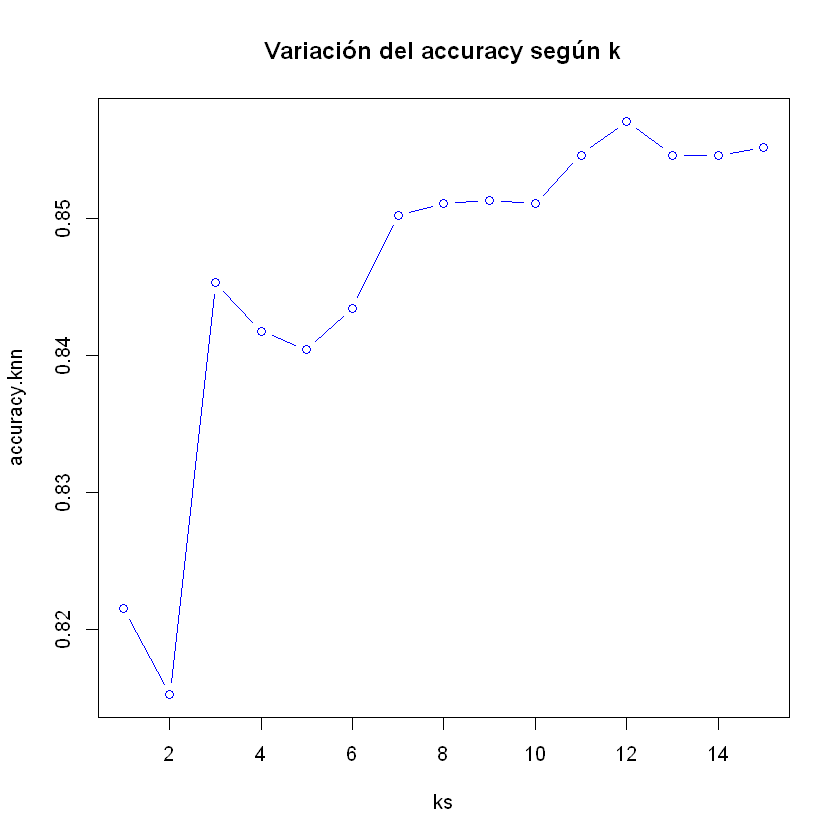

In [25]:
ks <- 1:15
accuracy.knn <- rep(NA, length(ks))
names(accuracy.knn) <- ks
for (k in ks){   
    obs <- datos.test$rain
    pred <- knn(train = datos.train[,2:11], test = datos.test[,2:11],
                cl = datos.train$rain, k = k)
    accuracy.knn[as.character(k)] <- sum(diag(table(obs, pred)))/sum(table(obs, pred))            
}
accuracy.knn
plot(ks,accuracy.knn, type = 'b', col = 'blue', main = 'Variación del accuracy según k')

Observamos que el accuracy obtenido es el mejor hasta ahora ya que alcanzamos 0.86 de acierto. Con lo cual, en este caso eligiremos para entrenar el 90% de la varianza explicada(10 PCs). Para el k óptimo observamos que no hay mucha diferencia entre k = 11,12,13,14 o 15, siendo 12 el de mayor accuracy. En mi caso, optaremos por entrenar el modelo con 12 vecinos.

In [93]:
obs = datos.test$rain
pred = knn(train = datos.train[,2:11], test = datos.test[,2:11],
                cl = datos.train$rain, k = 12)
sum(diag(table(obs, pred)))/sum(table(obs, pred))        

[1] 0.8571038

In [94]:
table(pred,obs)

          obs
pred       Not rain rains
  Not rain     2813   393
  rains         129   318

In [95]:
paste('True Positive Rate: ',2813/(2813+129))
paste('False Positive Rate: ',393/(393+318))

[1] "True Positive Rate:  0.956152277362339"

[1] "False Positive Rate:  0.552742616033755"

Observamos la matriz de confusión observamos que ese modelo no es realmente bueno. Es cierto que realiza una buena predicción sobre la no ocurrencia de lluvia, sin embargo en la ocurrencia de lluvia falla más que acierta a pesar de obtener un accuracy bueno con el modelo entrenado.


### Punto 3 (2 puntos):

Repetid el experimento anterior considerando la precipitación discretizada a partir del valor 20 mm, que es el estándar definido para establecer los días en que ha llovido de forma intensa.

* ¿Cómo cambian los valores óptimos de `K` y de número de PCs? 
* ¿Cómo cambian los errores sobre el conjunto de test en este caso?
* En caso de existir diferentes significativas en ambos casos, ¿a qué crees que puede ser debido? ¿La frecuencia en la muestra del evento a predecir puede influir en la calidad de la predicción?



In [29]:
#discretizamos la variable objetivo para ver indicar si llueve o no
data2 = read.csv('meteo.csv')
data2 = data2[,-1]
rain = ifelse(data2$y >= 20, "heavy", "Not heavy")
data2$y = as.factor(rain)
names(data2)[1] = "rain"
datos2 = data.frame(rain = data2$rain, pca$x)

In [30]:
length(which(datos2$rain == 'heavy'))
length(which(datos2$rain != 'heavy'))

[1] 280

[1] 10678

Observamos que hay una diferencia considerable entre observaciones de heavy rain y observaciones de not heavy rain, es posible que influya en nuestro modelo.

In [31]:
datos2.train = datos2[indtrain,] 
datos2.test = datos2[indtest,]

1         2         3         4         5         6         7         8 
0.9512729 0.9540104 0.9709828 0.9707090 0.9742677 0.9739940 0.9750890 0.9750890 
        9        10        11        12        13        14        15 
0.9750890 0.9750890 0.9750890 0.9750890 0.9750890 0.9750890 0.9750890

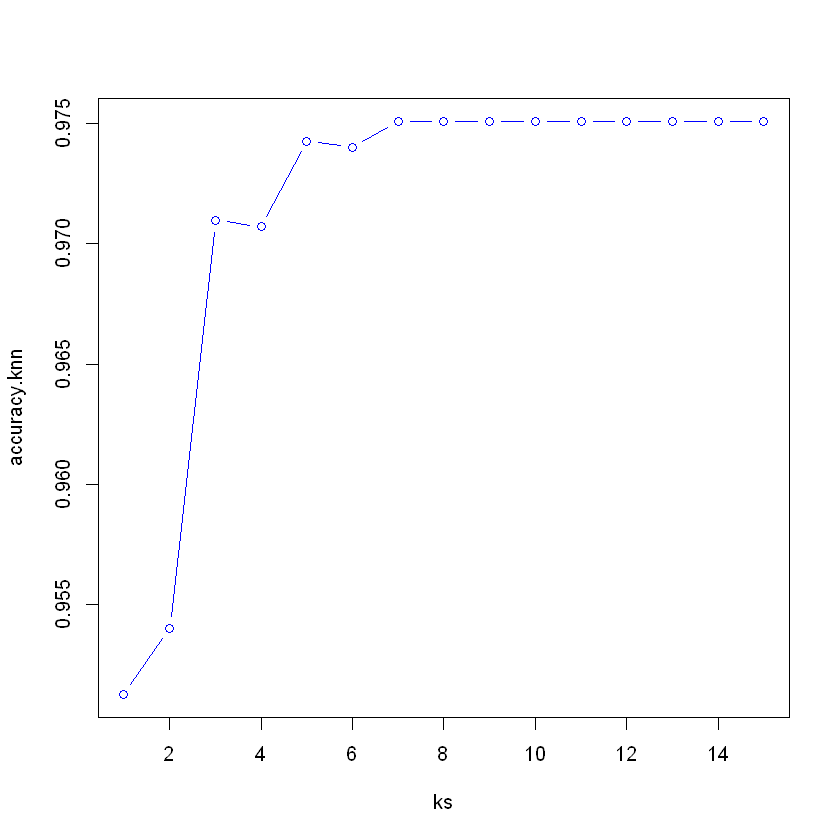

In [32]:
ks <- 1:15
accuracy.knn <- rep(NA, length(ks))
names(accuracy.knn) <- ks
for (k in ks){   
    obs <- datos2.test$rain
    pred <- knn(train = datos2.train[,2, drop = FALSE], test = datos2.test[,2, drop = FALSE],
                cl = datos2.train$rain, k = k)
    accuracy.knn[as.character(k)] <- sum(diag(table(obs, pred)))/sum(table(obs, pred))            
}
accuracy.knn
plot(ks, accuracy.knn, type = 'b', col = 'blue')

En este caso, observamos que entre 5 y 15 vecinos la diferencia de accuracy es muy pequeña(a partir de 7 está completamente estabilizada). Con lo cual  podemos elegir un k intermedio para no incurrir en sobreajuste o que el modelo no pierda capacidad predictiva, por ejemplo k = 7.

1         2         3         4         5         6         7         8 
0.9567479 0.9553791 0.9726252 0.9720777 0.9745415 0.9742677 0.9748152 0.9748152 
        9        10        11        12        13        14        15 
0.9748152 0.9750890 0.9750890 0.9750890 0.9750890 0.9750890 0.9750890

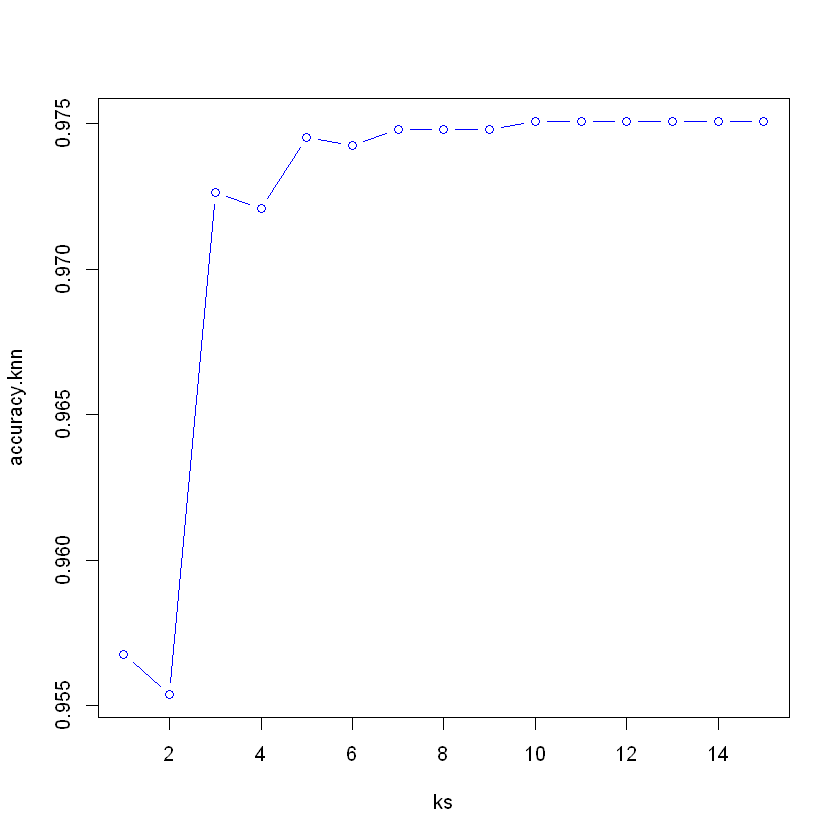

In [33]:
ks <- 1:15
accuracy.knn <- rep(NA, length(ks))
names(accuracy.knn) <- ks
for (k in ks){   
    obs <- datos2.test$rain
    pred <- knn(train = datos2.train[,2:4], test = datos2.test[,2:4],
                cl = datos2.train$rain, k = k)
    accuracy.knn[as.character(k)] <- sum(diag(table(obs, pred)))/sum(table(obs, pred))            
}
accuracy.knn
plot(ks, accuracy.knn, type = 'b', col = 'blue')

En este caso nos encontramos en una situación similar a la anterior, con una elección de k entre 5 y 15, y el razonamiendo sería análogo.

1         2         3         4         5         6         7         8 
0.9572954 0.9581166 0.9709828 0.9728990 0.9745415 0.9742677 0.9750890 0.9748152 
        9        10        11        12        13        14        15 
0.9750890 0.9753627 0.9756365 0.9756365 0.9753627 0.9748152 0.9748152

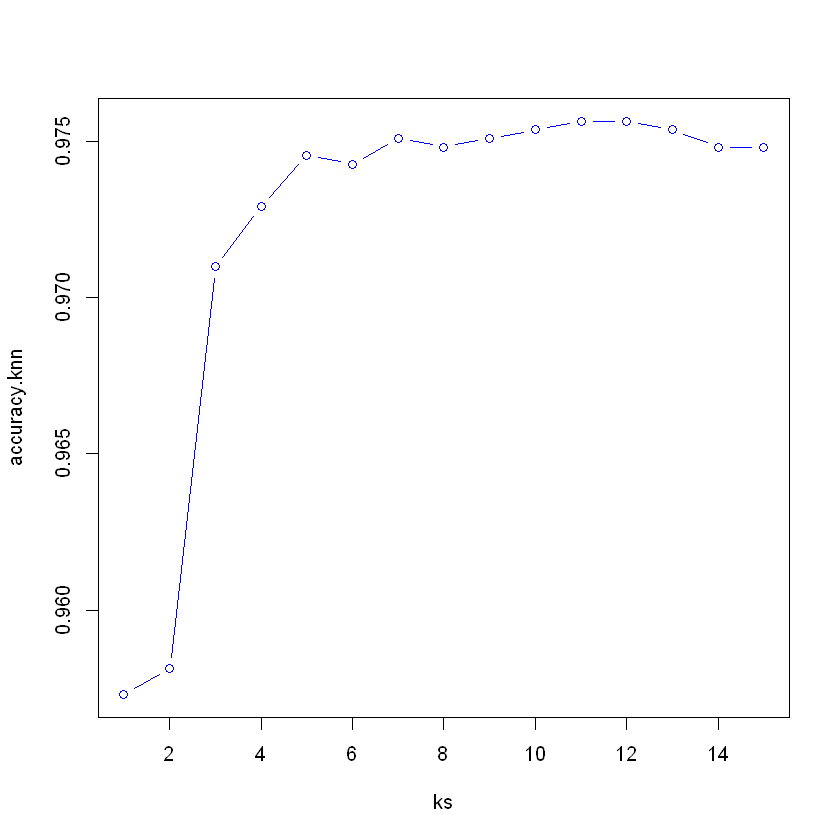

In [34]:
ks <- 1:15
accuracy.knn <- rep(NA, length(ks))
names(accuracy.knn) <- ks
for (k in ks){   
    obs <- datos2.test$rain
    pred <- knn(train = datos2.train[,2:7], test = datos2.test[,2:7],
                cl = datos2.train$rain, k = k)
    accuracy.knn[as.character(k)] <- sum(diag(table(obs, pred)))/sum(table(obs, pred))            
}
accuracy.knn
plot(ks, accuracy.knn, type = 'b', col = 'blue')

Razonamiento análogo a los anteriores, el accuracy segúnk incrementa hasta k = 5, donde empieza a variar ligeramente. El k se eligiría entre el intervalo 5-15.

1         2         3         4         5         6         7         8 
0.9562004 0.9622228 0.9726252 0.9726252 0.9750890 0.9739940 0.9756365 0.9759102 
        9        10        11        12        13        14        15 
0.9753627 0.9748152 0.9748152 0.9750890 0.9750890 0.9750890 0.9750890

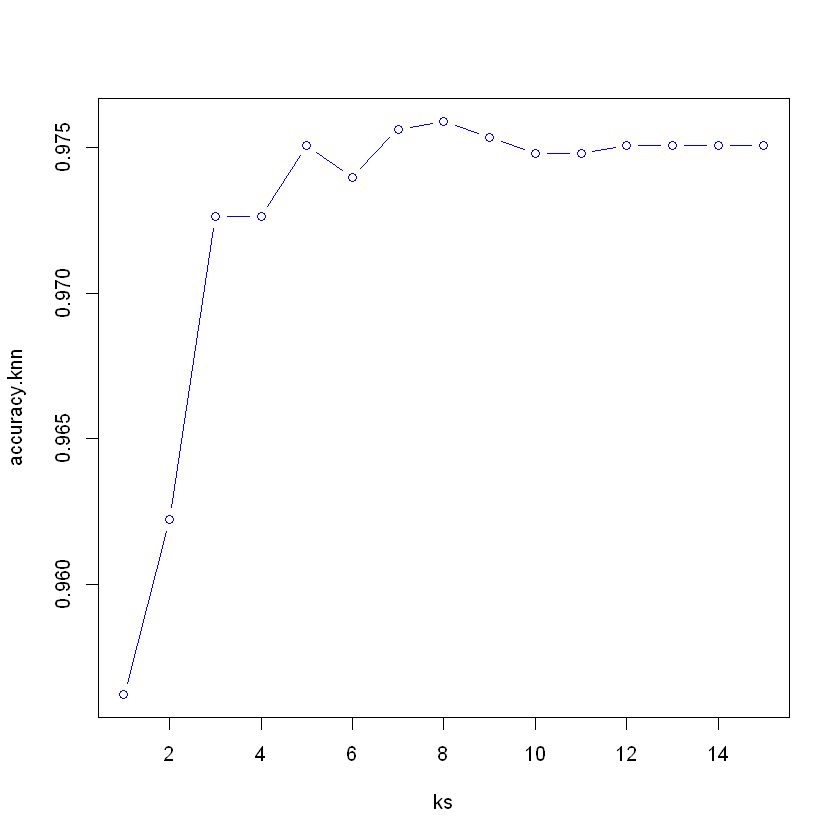

In [35]:
ks <- 1:15
accuracy.knn <- rep(NA, length(ks))
names(accuracy.knn) <- ks
for (k in ks){   
    obs <- datos2.test$rain
    pred <- knn(train = datos2.train[,2:11], test = datos2.test[,2:11],
                cl = datos2.train$rain, k = k)
    accuracy.knn[as.character(k)] <- sum(diag(table(obs, pred)))/sum(table(obs, pred))            
}
accuracy.knn
plot(ks, accuracy.knn, type = 'b', col = 'blue')

Observamos aquí que el k óptimo sería entre 5 y 15 debido a que es prácticamente el mismo accuracy. Cogeremos un k = 8.

Notamos que apenas hay diferencia entre elegir diferentes PCs, ya que con una sola obtenemos un accuracy muy parecido a utilizar más PCs.Con lo cual ya tenemos una diferencia clara al caso de ocurrencia o no de lluvia. En ese primer caso el a ccuracy aumentaba según ibamos cogiendo PCs y los k óptimos solían ser k's mayores que 10. En este caso vemos que con una componente principal, la accuracy que se obtiene es muy similar a la obtenida en el resto de los casos. Además la vemos como generalmente el k suele estabilizarse a partir de un k bajo (ej:k=5). Por tanto decidimos entrenar el modelo con una PC y con k = 7.

In [36]:
obs <- datos2.test$rain
pred <- knn(train = datos2.train[,2, drop = FALSE], test = datos2.test[,2, drop = FALSE],
                cl = datos2.train$rain, k = 7)
sum(diag(table(obs, pred)))/sum(table(obs, pred)) 

[1] 0.975089

In [37]:
table(pred,obs)

           obs
pred        heavy Not heavy
  heavy         0         0
  Not heavy    91      3562

Vemos que la predicción no es lo que esperábamos. Lo que hace el modelo es categorizar todas las observaciones como NotHeavy y ninguna como heavy. Con lo cual parece que la frecuencia en la muestra del evento a predecir influye en la calidad de la predicción. Recordemos que al principio de esta sección observabamos la enorme diferencia entre las observaciones que existian de heavy y not heavy(275 conta casi 11000!!). Por tanto, esta diferencia influye en la predicción y a pesar de obtener altos accuracies la clasificación no es buena.

Vamos a comprobar que pasa si utilizamos más PCs.

In [38]:
obs <- datos2.test$rain
pred <- knn(train = datos2.train[,2:3], test = datos2.test[,2:3],
                cl = datos2.train$rain, k = 7)
sum(diag(table(obs, pred)))/sum(table(obs, pred)) 
table(pred,obs)

[1] 0.975089

           obs
pred        heavy Not heavy
  heavy         0         0
  Not heavy    91      3562

In [39]:
obs <- datos2.test$rain
pred <- knn(train = datos2.train[,2:7], test = datos2.test[,2:7],
                cl = datos2.train$rain, k = 7)
sum(diag(table(obs, pred)))/sum(table(obs, pred)) 
table(pred,obs)

[1] 0.975089

           obs
pred        heavy Not heavy
  heavy         2         2
  Not heavy    89      3560

In [40]:
obs <- datos2.test$rain
pred <- knn(train = datos2.train[,2:11], test = datos2.test[,2:11],
                cl = datos2.train$rain, k = 7)
sum(diag(table(obs, pred)))/sum(table(obs, pred)) 
table(pred,obs)

[1] 0.9756365

           obs
pred        heavy Not heavy
  heavy         2         0
  Not heavy    89      3562

Observamos que practicamente sucede lo mismo, nuestro modelo tiende a clasificar a la variable con una frecuencia superior en las observaciones. El error cometido es mucho menor que en la clasificación de ocurrencia, sin embargo la clasificación es peor.

### Punto 4 (2 puntos):

Considerando el número de PCs óptimo obtenido en el apartado anterior, predecid el conjunto de test utilizando en este caso la regresión logística como método de clasificación (`Nota:` ver `Práctica Clasificacion Lineal` en el Moodle de la asignatura de Estadística o en la de Minería de Datos). 

* Comparad los resultados obtenidos utilizando ambos métodos para la predicción de la ocurrencia de precipitación y de precipitación intensa (`Nota:` considerar, por ejemplo, la curva ROC para la comparación), ¿alguno de los métodos se comporta mejor que el otro de forma sistemática?

### Caso 1: Ocurrencia o no de lluvia

In [41]:
data3 = read.csv('meteo.csv')
data3 = data3[-1]
rain = ifelse(data3$y >= 1,1,0)#0 no llueve, 1 llueve
data3$y = as.factor(rain)
names(data3)[1] = "rain"
pca = prcomp(data[,-1], center = TRUE , scale. = TRUE)
datos3 = data.frame(rain = data3$rain, pca$x)
datos3 = datos3[,1:11]#Número de PCs óptimas es 10

In [42]:
datos3.train = datos3[indtrain,] 
datos3.test = datos3[indtest,]

In [43]:
model1 = glm(rain~., data = datos3.train, family = binomial(link = "logit"))

In [44]:
out = model1$fitted.values

In [45]:
outbin = as.double(out > 0.5)#hacemos binaria la salida a modo de probabilidad

In [46]:
100*sum(diag(table(datos3.train[,1], outbin))) / length(outbin)

[1] 87.44695

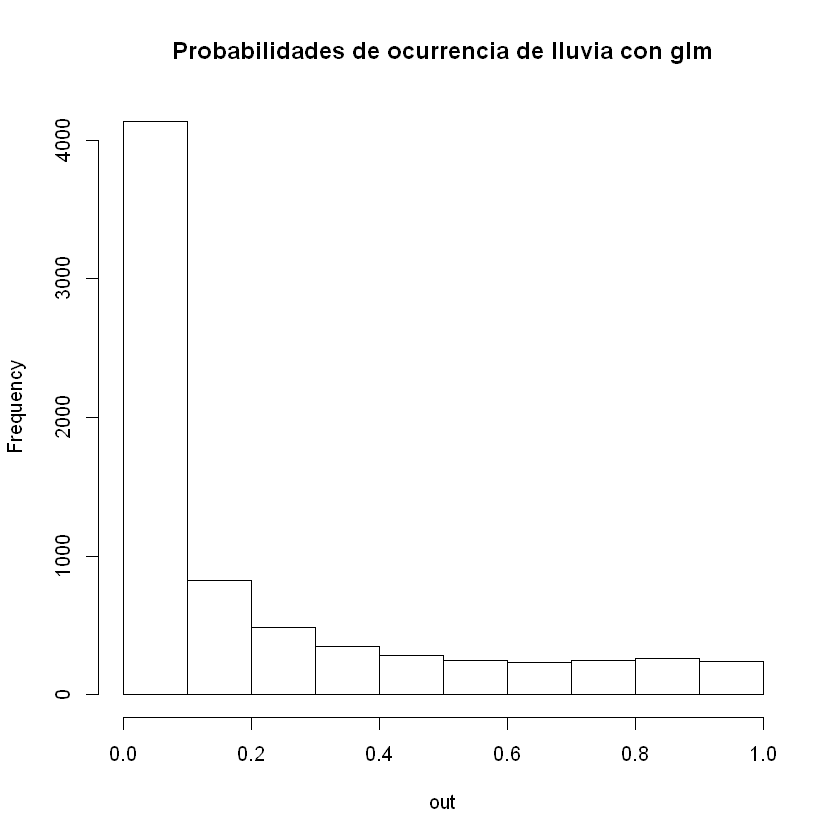

In [47]:
hist(out, main= 'Probabilidades de ocurrencia de lluvia con glm')

In [48]:
table(outbin, datos3.train[,1])

      
outbin    0    1
     0 5477  603
     1  314  911

In [49]:
library("AUC")

AUC 0.3.0

Type AUCNews() to see the change log and ?AUC to get an overview.



In [50]:
#tasa de acierto del test
out2 = predict(object=model1, newdata = datos3.test)
outbin2 = as.double(out2 > 0.5)
100*sum(diag(table(datos3.test[,1], outbin2))) / length(outbin2)

[1] 87.10649

In [51]:
table(outbin2,datos3.test[,1])

       
outbin2    0    1
      0 2851  380
      1   91  331

[1] 0.9204929

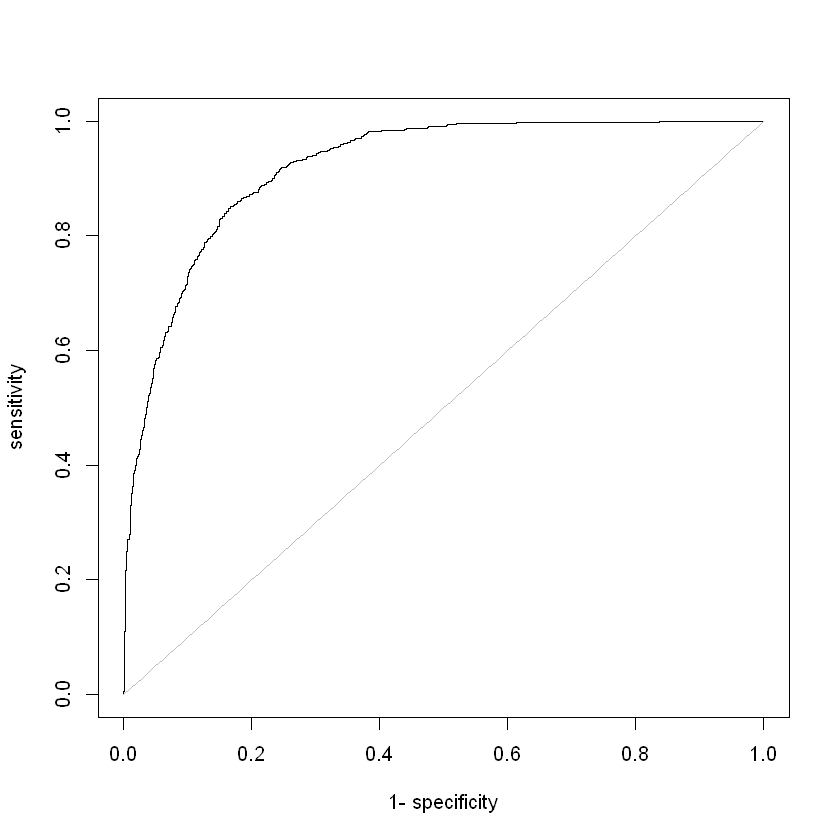

In [52]:
roc<-roc(out2,as.factor(datos3.test[,1]))

auc(roc)

plot(roc)

Con la predicción de nuestro modelo con los datos de train, tenemos una buena clasificación ya que para la no ocurrencia de lluvia acierta casi siempre(notar que acierte casi en 5600 casos y "solo" falla en 300) y con la ocurrencia de lluvia acierta el 60% de las veces. Sin embargo, cuando validamos con el test observamos que la predicción de no lluvia sigue siendo buena(acierta casi en 3000 casos y falla en 80-90 una diferencia de tamaño significativa) pero en la predicción de los días de lluvia nuestro modelo falla más que acierta.

### Caso 2: Ocurrencia o no de lluvia extrema

In [63]:
data4 = read.csv('meteo.csv')
data4 = data4[-1]
rain = ifelse(data4$y >= 20, 1, 0) #0 no intenso, 1 intenso
data4$y = as.factor(rain)
names(data4)[1] = "rain"
datos4 = data.frame(rain = data4$rain, pca$x)
datos4 = datos4[,1:2]#cogemos solamente una PC

In [64]:
datos4.train = datos4[indtrain,] 
datos4.test = datos4[indtest,]

In [65]:
model2 <- glm(rain~., data = datos4.train, family = binomial(link = "logit"))

In [66]:
out3 <- model2$fitted.values

In [67]:
outbin3 <- as.double(out3 > 0.5)#hacemos binaria la salida a modo de probabilidad

In [68]:
100*sum(diag(table(datos4.train[,1], outbin3))) / length(outbin3)

[1] 97.41273

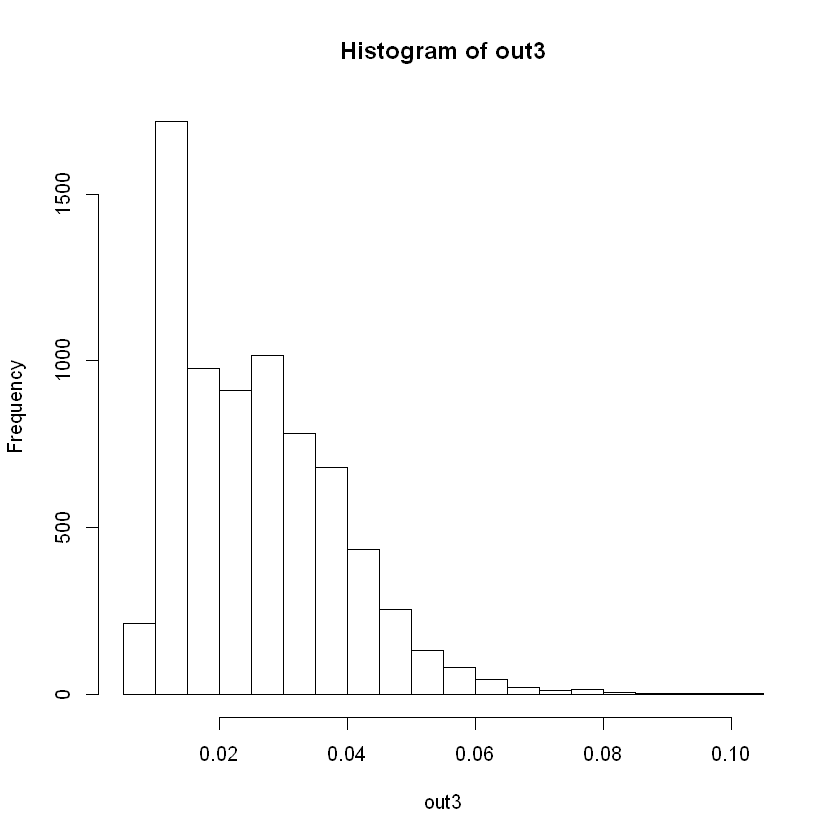

In [69]:
hist(out3)

In [70]:
#tasa de acierto del test
out4<- predict(object=model2, newdata = datos4.test);
outbin4 <- as.double(out4 > 0.5)
100*sum(diag(table(datos4.test[,1], outbin4))) / length(outbin4)

[1] 97.5089

In [71]:
table(outbin4,datos4.test[,1])

       
outbin4    0    1
      0 3562   91

[1] 0.6155389

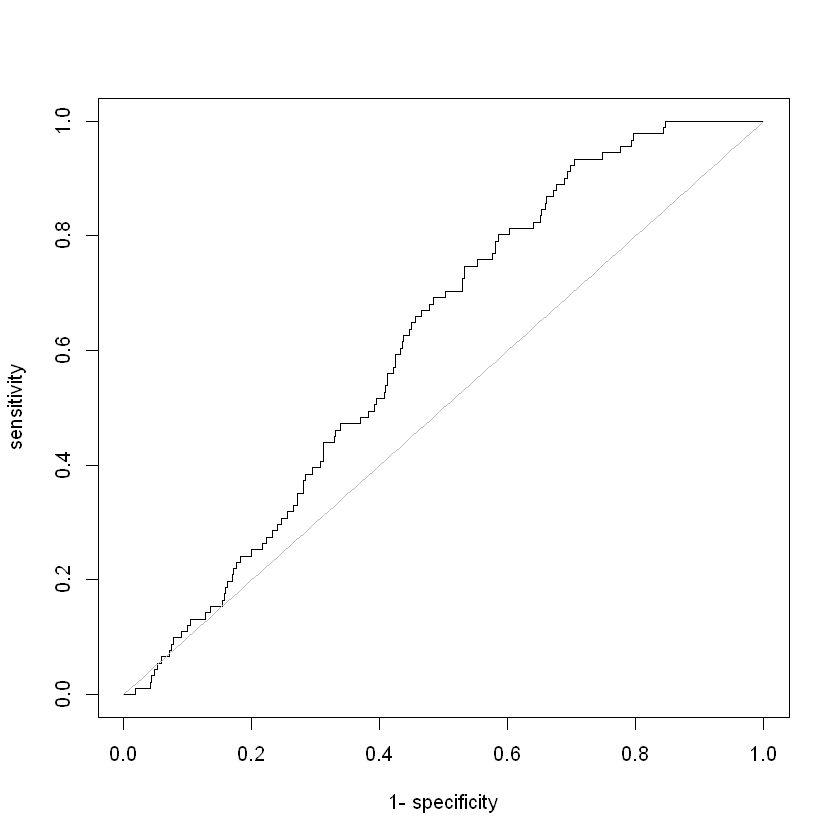

In [72]:
roc<-roc(out4,as.factor(datos4.test[,1]))

auc(roc)

plot(roc)

El modelo no es bueno, debido a que se basa en predecir todas las observaciones como Not heavy rain como ya vimos que sucedia en knn.

Veamos ahora las curvas ROC para el método knn. Para ello es necesario obtener las probabilidades que saca la función knn. Para 
ello establecemos el argumento prob como TRUE y para obtenerlas utilizamos attr(pred,'prob').

Comenzamos con la predicción de lluvia y despúes mostraremos la predicción de lluvia intensa.

In [73]:
obs = datos.test$rain
pred = knn(train = datos.train[,2:11,drop = FALSE], test = datos.test[,2:11,drop = FALSE],
                cl = datos.train$rain, k = 15, prob = TRUE)
sum(diag(table(obs, pred)))/sum(table(obs, pred)) 

[1] 0.8551875

In [74]:
table(pred,obs)

          obs
pred       Not rain rains
  Not rain     2808   395
  rains         134   316

In [75]:
probabilities = 1-attr(pred,"prob")#para mostrar las prob de rain ya que tenemos como winnig class not rain

[1] 0.8261124

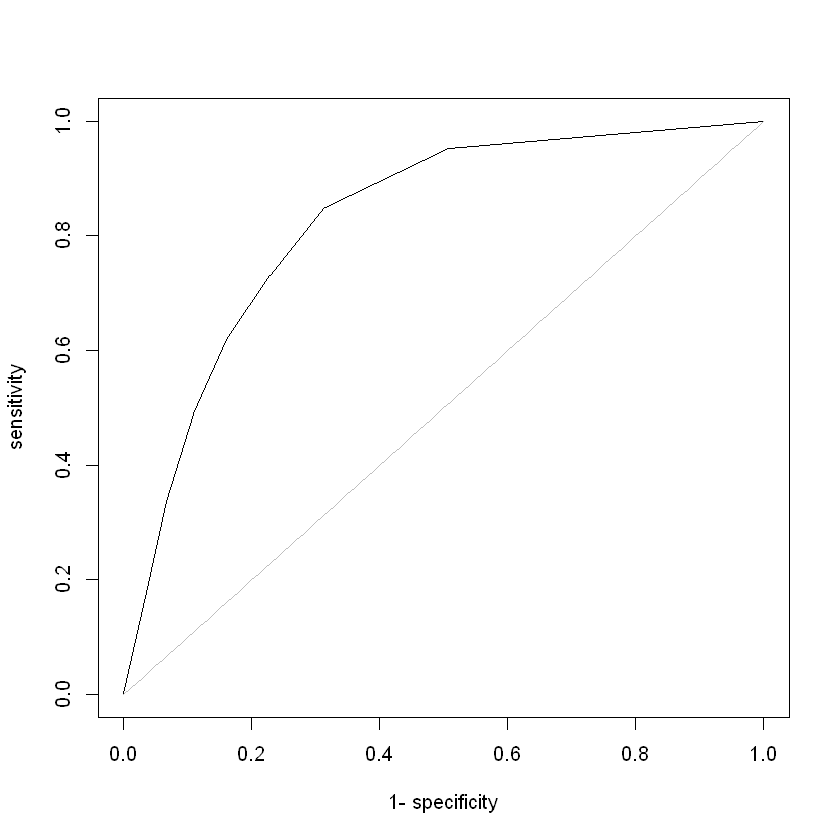

In [76]:
roc<-roc(probabilities,obs)

auc(roc)

plot(roc)

In [83]:
obs <- datos2.test$rain
pred <- knn(train = datos2.train[,2, drop = FALSE], test = datos2.test[,2, drop = FALSE],
                cl = datos2.train$rain, k = 7, prob = TRUE)
sum(diag(table(obs, pred)))/sum(table(obs, pred)) 

[1] 0.975089

In [84]:
probabilities = attr(pred,"prob")

[1] 0.5650271

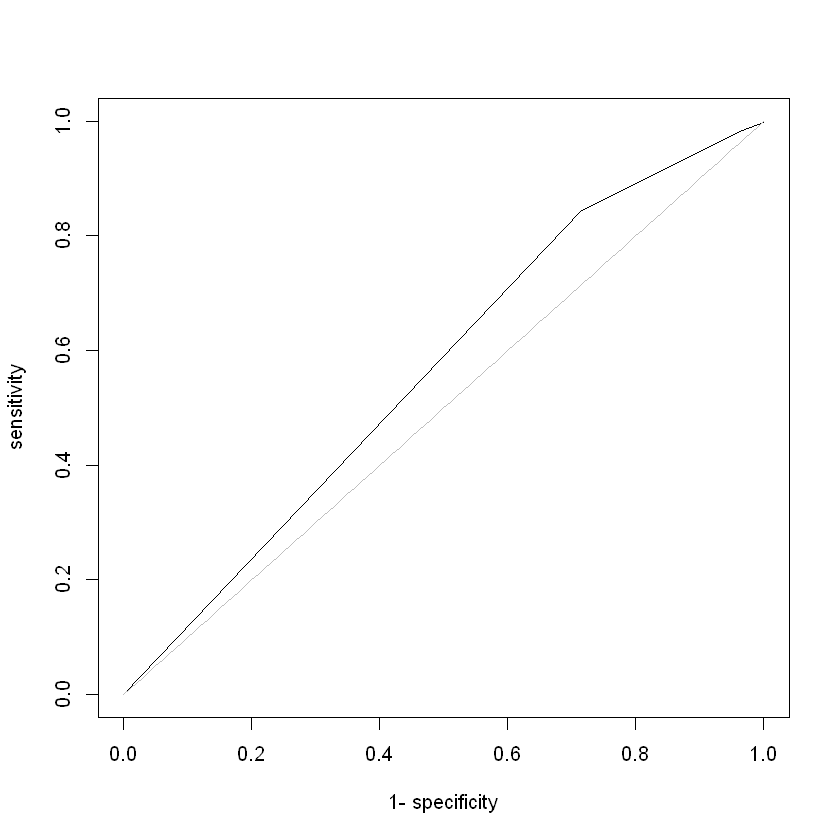

In [85]:
roc<-roc(probabilities,obs)

auc(roc)

plot(roc)

Si nos guiamos por las comparaciones con la curva ROC, podemos notar que sistemáticamente la regresión logística funciona ligeramente que knn para este caso en particular. 

Claramente, la predicción de lluvia es mejor que la predicción de lluvia intensa. Como vimos en puntos anteriores, parece ser que la calidad de la predicción se ve afectada por la frecuencia de ocurrencia en las observaciones(vemos que la predicción de lluvia intensa está cercana a la diagonal, eso significa que está cerca de ser aleatoria).